# Salary Predictions: Statistical Analysis and Simple Linear Regression

In this notebook, we will perform a comprehensive exploration and analysis of a dataset containing salary data alongside variables like years of experience and age. The objectives are multifaceted:

1. **Exploratory Data Analysis (EDA)**: Initially, we'll analyse the dataset's structure, characteristics, and distributions. Visualizations such as histograms, heatmaps, scatter plots and Q-Q plots will be used to understand the nature of our data.

2. **Statistical Testing**: To draw more nuanced conclusions, various statistical tests will be employed. This includes assessing the normality of our data with tests like the Shapiro-Wilk, understanding the relationship between variables through correlation tests (both Pearson's and Spearman's), and evaluating the homogeneity of variances using Levene's test.

3. **Linear Regression Analysis**: With a foundational understanding of our data, we'll then build a linear regression model. This model aims to understand how predictors, in this case we will only use years of experience to build a simple linear regression, influence an individual's salary. By the end of this analysis, we'll derive a mathematical equation representing this relationship, which can serve as a predictive tool or as a means of understanding the underlying patterns in our dataset.

Dominik Bacher, 2023

* **Email:** [dominikbacher@icloud.com](mailto:dominikbacher@icloud.com)
* **LinkedIn:** [linkedin.com/in/dominikbacher](https://www.linkedin.com/in/dominikbacher/)
* **GitHub:** [github.com/dominik117](https://github.com/dominik117)


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

import scipy.stats as stats

plt.style.use("seaborn")

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Initial EDA

In [2]:
df = pd.read_csv("../data/Salary_Data.csv")
print(df.shape)
df.sample(5)

(30, 3)


,YearsExperience,Age,Salary
25,9.0,34.0,105582
1,1.3,21.5,46205
24,8.7,33.0,109431
22,7.9,31.0,101302
20,6.8,30.0,91738


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


There is no need for data wrangling 

In [4]:
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


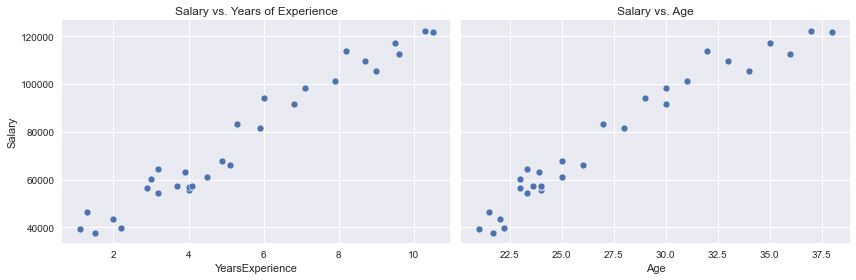

In [5]:
# Scatter plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.scatterplot(data=df, x='YearsExperience', y='Salary', ax=axs[0])
axs[0].set_title("Salary vs. Years of Experience")

sns.scatterplot(data=df, x='Age', y='Salary', ax=axs[1])
axs[1].set_title("Salary vs. Age")

fig.tight_layout()
plt.show()

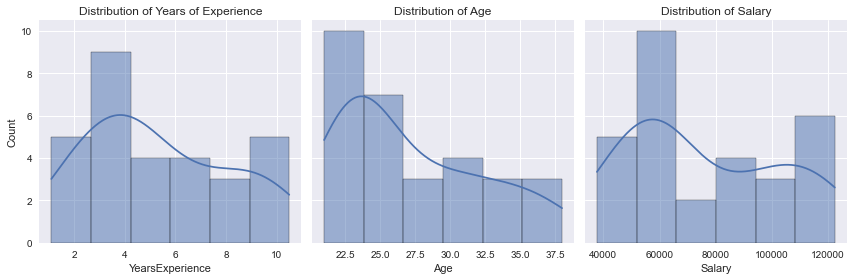

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

sns.histplot(df['YearsExperience'], kde=True, ax=axs[0])
axs[0].set_title("Distribution of Years of Experience")

sns.histplot(df['Age'], kde=True, ax=axs[1])
axs[1].set_title("Distribution of Age")

sns.histplot(df['Salary'], kde=True, ax=axs[2])
axs[2].set_title("Distribution of Salary")

fig.tight_layout()
plt.show()

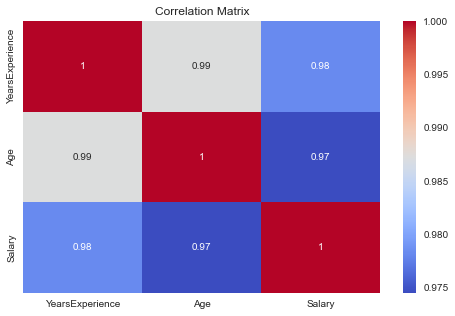

In [7]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Statistical Tests

### Pearson's Correlation Test

In [8]:
corr_exp, p_exp = stats.pearsonr(df['YearsExperience'], df['Salary'])
print(f"Pearson's correlation between YearsExperience and Salary: r = {corr_exp:.2f}, p-value = {p_exp:.20f}")

corr_age, p_age = stats.pearsonr(df['Age'], df['Salary'])
print(f"Pearson's correlation between Age and Salary: r = {corr_age:.2f}, p-value = {p_age:.20f}")

Pearson's correlation between YearsExperience and Salary: r = 0.98, p-value = 0.00000000000000000001
Pearson's correlation between Age and Salary: r = 0.97, p-value = 0.00000000000000000010


1. **Pearson's correlation between YearsExperience and Salary**:
    - **r = 0.98**: The correlation coefficient (r) measures the strength and direction of the linear relationship between two variables. Its values range between -1 and 1. A value of 0.98 is extremely close to 1, which indicates a very strong positive linear relationship between `YearsExperience` and `Salary`. This means that as years of experience increase, salary tends to increase as well, and the relationship is very consistent.
    - **p-value = 0.00000000000000000001**: The p-value is an indicator of the significance of the test result. A smaller p-value suggests that the observed relationship in the sample is very unlikely to be due to random chance. Given this extremely small p-value, much smaller than the typical significance level of 0.05, we can reject the null hypothesis that there's no linear relationship between the two variables. Therefore, the observed correlation is statistically significant.

2. **Pearson's correlation between Age and Salary**:
    - **r = 0.97**: This correlation coefficient indicates a very strong positive linear relationship between `Age` and `Salary`. This suggests that as age increases, salary tends to increase as well, in a highly consistent manner. The strength is slightly less than the `YearsExperience` vs `Salary` correlation but still remarkably high.
    - **p-value = 0.00000000000000000010**: Again, this extremely small p-value indicates that the observed relationship between age and salary in the sample is very unlikely to be due to random chance. It's statistically significant, and we can reject the null hypothesis that there's no linear relationship between the two variables.

**Summary**: Both `YearsExperience` and `Age` have a very strong positive linear relationship with `Salary`, and both relationships are statistically significant. The relationship with `YearsExperience` is slightly stronger than that with `Age`, but both are substantial. 

These findings can be practically interpreted as:
- Individuals with more years of experience tend to have higher salaries.
- Older individuals tend to have higher salaries.

However, an important note is that correlation does not imply causation. While there's a strong association, it doesn't necessarily mean that increasing one's age or years of experience will directly cause an increase in salary. Other external factors might also play a role.

### Paired T-Test

In [9]:
t_stat, p_val = stats.ttest_rel(df['YearsExperience'], df['Age'])
print(f"\nPaired T-test between YearsExperience and Age: t = {t_stat:.2f}, p-value = {p_val}")


Paired T-test between YearsExperience and Age: t = -49.94, p-value = 1.1137738998958556e-29


**Background**:
A Paired T-test is used to compare the means of two related groups. The groups are "paired" because they come from the same set of individuals. For example, it might be used to test before-and-after scores for a group of individuals or in this case, two measurements (like `YearsExperience` and `Age`) from the same group of individuals.

Given the test results:

1. **t = -49.94**: 
    - This is the t-statistic, which provides a measure of how different the sample means of the two groups are in terms of standard errors. The negative sign indicates that the first mean (`YearsExperience`) is smaller than the second mean (`Age`).
    - A larger absolute value of the t-statistic indicates a larger difference between the two means relative to the variation within the groups.

2. **p-value = 1.1137738998958556e-29**: 
    - The p-value is an indicator of the significance of the test result. It represents the probability of observing a t-statistic as extreme as, or more extreme than, the one computed from the sample, given that the null hypothesis (that the two groups have identical average values) is true.
    - A smaller p-value suggests that the observed difference in means is very unlikely to be due to random chance or sampling error. 
    - Given this extremely small p-value, much smaller than the typical significance level of 0.05, we can reject the null hypothesis. This indicates that there's a statistically significant difference between the means of `YearsExperience` and `Age`.

**Summary**: 
The paired T-test indicates a statistically significant difference between the average `YearsExperience` and `Age` in the sample, with `YearsExperience` being, on average, significantly lower than `Age`. The direction of the difference (i.e., which one is higher on average) is indicated by the sign of the t-statistic.

However, it's important to note that while the test indicates a difference between these two variables, the practical significance or meaning of this difference depends on the context. Given that `YearsExperience` and `Age` are inherently different measures (one represents work experience while the other represents the age of individuals), the fact that they differ significantly might not be surprising.

### Shapiro-Wilk Test

In [10]:
shapiro_exp, p_shapiro_exp = stats.shapiro(df['YearsExperience'])
shapiro_age, p_shapiro_age = stats.shapiro(df['Age'])
shapiro_sal, p_shapiro_sal = stats.shapiro(df['Salary'])

print(f"Shapiro-Wilk Test for YearsExperience: p-value = {p_shapiro_exp:.4f}")
print(f"Shapiro-Wilk Test for Age: p-value = {p_shapiro_age:.4f}")
print(f"Shapiro-Wilk Test for Salary: p-value = {p_shapiro_sal:.4f}")

Shapiro-Wilk Test for YearsExperience: p-value = 0.1034
Shapiro-Wilk Test for Age: p-value = 0.0050
Shapiro-Wilk Test for Salary: p-value = 0.0152


The Shapiro-Wilk test is a statistical test used to determine whether a given sample of data is drawn from a normal distribution. The null hypothesis (\(H_0\)) of the test is that the data is normally distributed. The alternative hypothesis (\(H_1\)) is that the data is not normally distributed.

1. **YearsExperience**: 
   - p-value = 0.1034 
   - Typically, a significance level (often denoted as \( \alpha \)) of 0.05 is chosen as a threshold to determine significance. In this case, since the p-value is greater than 0.05, we fail to reject the null hypothesis, suggesting that the `YearsExperience` data does not deviate significantly from a normal distribution.

2. **Age**:
   - p-value = 0.0050 
   - The p-value is less than 0.05, which means that, under the Shapiro-Wilk test, the `Age` data deviates significantly from a normal distribution. Thus, we reject the null hypothesis in favor of the alternative.

3. **Salary**:
   - p-value = 0.0152
   - Similarly, the p-value is less than 0.05, which indicates that the `Salary` data is not drawn from a normal distribution. We reject the null hypothesis.

**Interpretation**:

- The `YearsExperience` data does not show significant evidence to suggest it deviates from normality.
  
- Both `Age` and `Salary` data seem to deviate from a normal distribution based on the Shapiro-Wilk test.

### Q-Q Plots

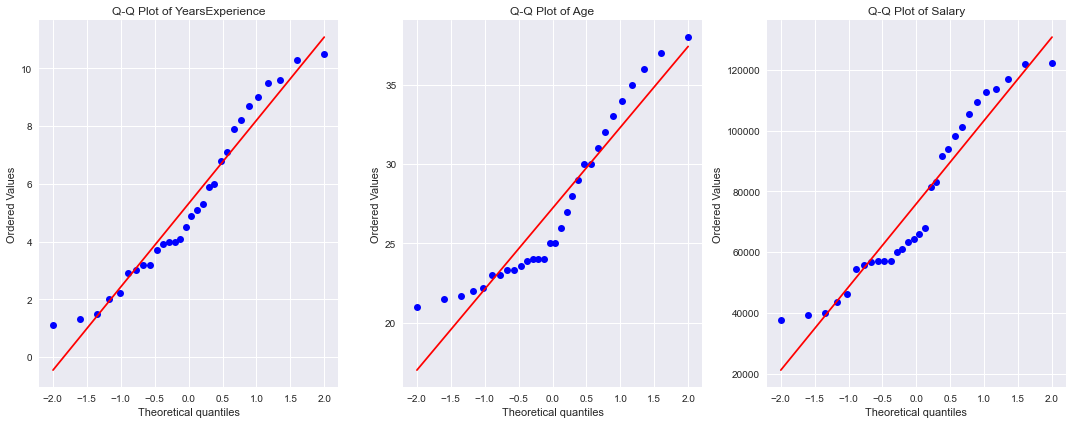

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

stats.probplot(df['YearsExperience'], plot=axs[0])
axs[0].set_title('Q-Q Plot of YearsExperience')

stats.probplot(df['Age'], plot=axs[1])
axs[1].set_title('Q-Q Plot of Age')

stats.probplot(df['Salary'], plot=axs[2])
axs[2].set_title('Q-Q Plot of Salary')

plt.tight_layout()
plt.show()

### Variance Equality Test: Levene's Test

In [12]:
lev_stat, p_lev = stats.levene(df['YearsExperience'], df['Age'])
print(f"Levene's Test (YearsExperience vs Age): p-value = {p_lev:.4f}")

Levene's Test (YearsExperience vs Age): p-value = 0.0155


Levene's test is a statistical test used to assess the equality of variances for two or more groups. The null hypothesis (\(H_0\)) of the test is that all input samples are from populations with equal variances. Conversely, the alternative hypothesis (\(H_1\)) is that at least one sample is from a population with a variance different from the others.

**Levene's Test (YearsExperience vs Age)**:
- p-value = 0.0155

The p-value is a measure of evidence against a null hypothesis. Typically, a significance level (often denoted as \( \alpha \)) of 0.05 is chosen as a threshold to determine if the result is statistically significant.

For the provided result:
- The p-value is less than 0.05, which suggests that there's significant evidence to reject the null hypothesis. This means, based on Levene's test, the variances of `YearsExperience` and `Age` are significantly different.

**Interpretation**:
The variances of the `YearsExperience` and `Age` variables are not equal, as indicated by the Levene's test result. 

It's essential to understand why you're testing for equal variances. For instance, many parametric statistical tests (like ANOVA or t-tests) assume that variances are equal across groups. If this assumption is violated, the results of such tests might not be valid, and you might need to consider alternative statistical methods or transformations.

### Spearman's Rank Correlation

In [13]:
spearman_exp, p_spearman_exp = stats.spearmanr(df['YearsExperience'], df['Salary'])
spearman_age, p_spearman_age = stats.spearmanr(df['Age'], df['Salary'])

print(f"Spearman's correlation between YearsExperience and Salary: rho = {spearman_exp:.2f}, p-value = {p_spearman_exp:.4f}")
print(f"Spearman's correlation between Age and Salary: rho = {spearman_age:.2f}, p-value = {p_spearman_age:.4f}")

Spearman's correlation between YearsExperience and Salary: rho = 0.96, p-value = 0.0000
Spearman's correlation between Age and Salary: rho = 0.95, p-value = 0.0000


**Spearman's Rank Correlation Coefficient** is a non-parametric measure of the strength and direction of the relationship between two variables. Unlike Pearson's correlation, which measures linear relationships between continuous variables, Spearman's correlation evaluates the monotonic relationship between two variables, using their ranks. Monotonic relationships can be either increasing or decreasing, but they don't necessarily have to be linear.

1. **YearsExperience and Salary**:
    - **rho = 0.96**: The Spearman's rank correlation coefficient is 0.96. This value is close to 1, indicating a strong positive monotonic relationship between `YearsExperience` and `Salary`. This means that, in general, as the years of experience increase, the salary also tends to increase. A rho value of 1 would indicate a perfect positive monotonic relationship.
    - **p-value = 0.0000**: This p-value is essentially zero, which is less than typical alpha levels like 0.05. This indicates that the correlation is statistically significant, and the likelihood that the observed correlation occurred by random chance is extremely low.

2. **Age and Salary**:
    - **rho = 0.95**: The Spearman's rank correlation coefficient is 0.95. Similar to the above, this indicates a strong positive monotonic relationship between `Age` and `Salary`. As age increases, the salary tends to also increase, though it's slightly less strong of a relationship compared to `YearsExperience` and `Salary`.
    - **p-value = 0.0000**: Again, this p-value suggests that the correlation is statistically significant, with the observed relationship being very unlikely to have occurred by random chance.

**Interpretation**:
Both `YearsExperience` and `Age` have strong positive relationships with `Salary`. Given the high correlation coefficients, we can say that they are strongly monotonic: as one variable increases, the other tends to also increase. The p-values suggest that these correlations are statistically significant, indicating a real relationship in the population from which the sample was drawn, not just a coincidental relationship in the sample data.

It's also worth noting that while correlation indicates a relationship between variables, it doesn't imply causation. Additionally, having two strong correlations like this might suggest multicollinearity if both `YearsExperience` and `Age` were used as predictors in a regression model for `Salary`.

## Linear Regression for Years of Experience

### Simple Linear Regression

In [14]:
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 21 samples.
Testing set has 9 samples.


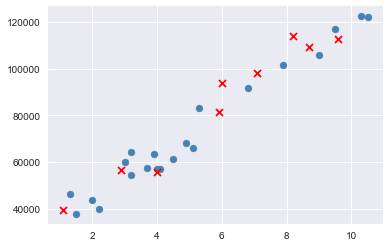

In [15]:
plt.scatter(X_train, y_train, color = 'steelblue', marker='o')
plt.scatter(X_test, y_test, color = 'red', marker='x')
plt.show()

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)

25621.026485025286 [9261.71335047]


In [17]:
def linear_regression_formula(intercept, coefficients, feature_names=None):
    """
    Constructs the linear regression formula based on the provided intercept and coefficients.
    
    Parameters:
    - intercept: The intercept from the linear regression model.
    - coefficients: The coefficients from the linear regression model.
    - feature_names (optional): List of feature names. If not provided, it'll default to x1, x2, etc.
    
    Returns:
    - A string representation of the linear regression formula.
    """

    # If feature names aren't provided, create default names
    if feature_names is None:
        feature_names = [f"x{i+1}" for i in range(len(coefficients))]
    
    # Construct the terms for each feature
    terms = [f"{coef:.2f} * {feature}" for coef, feature in zip(coefficients, feature_names)]
    
    # Construct the full formula
    formula = f"y = {intercept:.2f} + " + " + ".join(terms)
    
    return formula

# Example usage:
intercept = model.intercept_
coefficients = model.coef_
feature_names = ["YearsExperience"]

print(linear_regression_formula(intercept, coefficients, feature_names))

y = 25621.03 + 9261.71 * YearsExperience


In [18]:
predictions = model.predict(X_test)

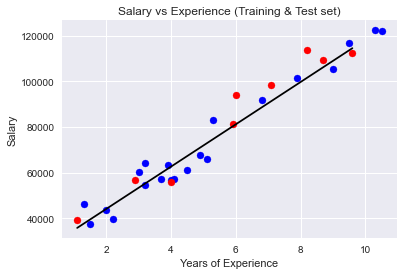

In [19]:
zipped = sorted(zip(X_test.values, predictions))
X_test_sorted, y_pred_sorted = zip(*zipped)
plt.scatter(X_train, y_train, color = 'blue')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test_sorted, y_pred_sorted, color = 'black')
plt.title("Salary vs Experience (Training & Test set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Plot predicted values vs the values from the test dataset

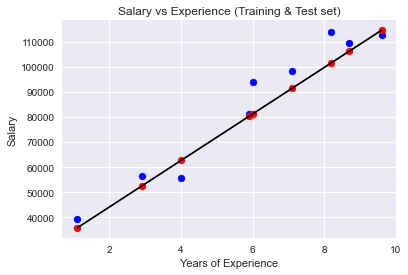

In [20]:
zipped = sorted(zip(X_test.values, predictions))
X_test_sorted, y_pred_sorted = zip(*zipped)
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, predictions, color = 'red')
plt.plot(X_test_sorted, y_pred_sorted, color = 'black')
plt.title("Salary vs Experience (Training & Test set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [21]:
model.score(X_test, y_test)

0.9270477742208345

In [22]:
print(f"MAE {mean_absolute_error(y_test,predictions):.4f}")
print(f"MSE {mean_squared_error(y_test,predictions):.4f}")
print(f"RMSE {np.sqrt(mean_squared_error(y_test,predictions)):.4f}")
print(f"Explained Variance Score {explained_variance_score(y_test,predictions):.4f}")
print(f"R2 Score {r2_score(y_test,predictions):.4f}")
print(f"Cross Validation Score {np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')):.4f}")

MAE 5854.0896
MSE 50257386.3710
RMSE 7089.2444
Explained Variance Score 0.9492
R2 Score 0.9270
Cross Validation Score 0.9439


--------------
# End of Notebook